In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math as ma
from pylab import meshgrid
#import pylab
import random
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import matplotlib.pyplot as plt

bsf = 0
def main():
    x=random.uniform(-10, 10)
    y=random.uniform(-10, 10)
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    #ax2 = fig.add_subplot(121, projection='3d')

    #fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(9, 9.6), projection='3d')
    
    x1 = np.arange(-10.0,10.0,0.1)
    x2 = np.arange(-10.0,10.0,0.1)
    X1,X2 = meshgrid(x1, x2)
    Y = fungsi(X1, X2)
    ax1.plot_wireframe(X1, X2, Y)
    
    
    fig.canvas.draw()
    #plt.show(block=False)
    plt.ion()
    #print(x)
    #print(y)
    xb,yb=[x],[y]
    fx= fungsi(x,y)
    cooling_rate= 0.01
    initial_state= fx #ok
    current_state= initial_state #ok
    best_so_far= current_state #ok
    #k=0
    T=20 #ok
    while (T>cooling_rate*0.01):
        #ax2.cla()
        ax1.cla()
        plt.ion()
        #ax1.axis('off')
        #print("{0:.10f}".format(T))
        xnew = random.uniform(-10, 10) #ok
        ynew = random.uniform(-10, 10) #ok
       #print(xnew)
        new_state= fungsi(xnew,ynew) #ok
        plt.suptitle('temp: '+str(T))
        #plt.suptitle('best so far: '+str(best_so_far))
        #ax1.text(0.1, 0.9,'best so far: '+str(best_so_far),fontsize=16)
        ax1.plot_wireframe(X1, X2, Y)
        ax1.scatter(xs=[xnew], ys=[ynew], zs=[new_state], s=62, c='#00ff00')
        ax1.scatter(xs=[xb], ys=[yb], zs=[best_so_far], s=62, c='#ff0000',label='best so far: '+str(best_so_far))
        ax1.legend()
        #plt.pause(0.0001)
        fig.canvas.draw()
        plt.draw()
        #plt.show(block=True)
        
        deltaE= new_state-current_state #ok
        if(deltaE<0): #ok
            current_state= new_state #ok
            best_so_far= new_state #ok
            xb=xnew
            yb=ynew
        else:
            prob = setProbability(deltaE, T) #ok
            rand = random.uniform(0,1) #ok
            if(rand<=prob): #ok if a random num is less than the prob (means that the prob is good) then change current state
                current_state = new_state #ok
        #if (k%3==0):
        T=annealingSchedule(T, cooling_rate) #ok
        #k+=1

    print('final temp: ',T)
    print('best solution: ',xb,' ',yb)
    print('Best so Far: ',best_so_far) #ok
    #bsf=best_so_far
    
    #ax1.remove()
    
    #fig2 = plt.figure()
#     ax2 = fig.add_subplot(111, projection='3d')
#     ax2.plot_wireframe(X1, X2, Y)
    print(xb,yb,bsf)
#     ax2.scatter(xs=[xb], ys=[yb], zs=[best_so_far], s=62, c='#ff0000')
    plt.rcParams['figure.figsize'] = [9, 10]
    plt.show()


def annealingSchedule(T, cooling_rate):
    return T-(T*cooling_rate)

def fungsi(x1,x2): #ok
    return -1*np.absolute(np.sin(x1)*np.cos(x2)*np.exp(np.absolute(1-(np.sqrt(x1**2+x2**2)/ma.pi))))

def setProbability(delta, T): #ok
    return ma.exp(-delta/T)

#print(f(1,99))

<IPython.core.display.Javascript object>


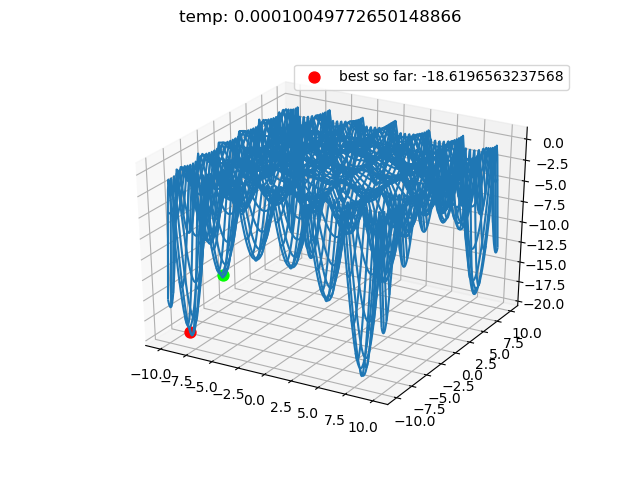

final temp:  9.949274923647377e-05
best solution:  -8.01615000195605   -9.899675162725408
Best so Far:  -18.6196563237568
-8.01615000195605 -9.899675162725408 0


In [4]:
main()